In [9]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Gentium"
plt.rcParams['mathtext.fontset'] = "cm"

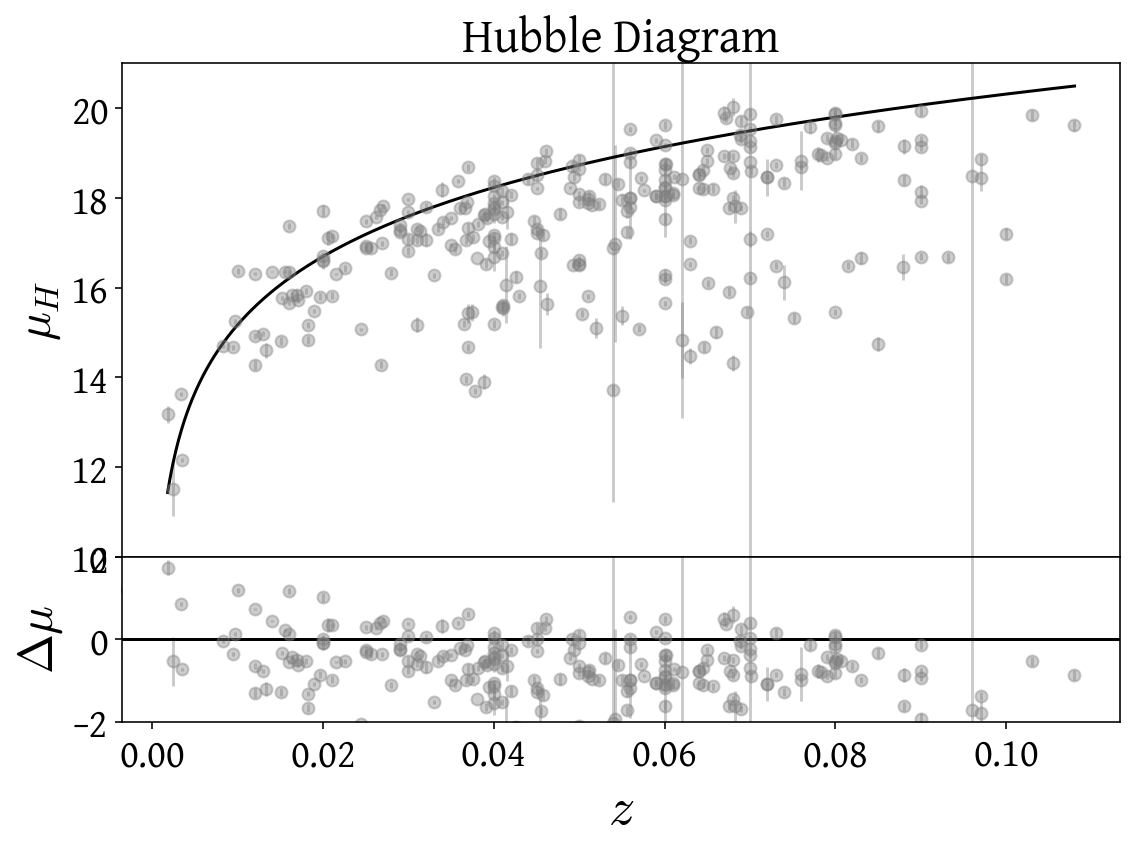

In [45]:
band = 'H'
params_df = pd.read_csv('sn_parameters.csv')
params_df = params_df.sort_values('z')

z = params_df.z.values
z_cosmo = np.linspace(z.min(), z.max(), 1000)
mu = cosmo.distmod(z_cosmo).value
mag = params_df[f'{band}max'].values
mag_err = params_df[f'{band}max_err'].values

# plots
fig, ax = plt.subplots(2, 1, figsize=(8, 6), 
                       gridspec_kw={'hspace':0, 'height_ratios':[3,1]})
    
# HD
ax[0].errorbar(z, mag, yerr=mag_err, 
            fmt='o', color='gray', alpha=0.4)
ax[0].plot(z_cosmo, mu-18, c='k')

# residual
ax[1].errorbar(z, mag-(cosmo.distmod(z).value-18), yerr=mag_err, 
            fmt='o', color='gray', alpha=0.4)
ax[1].axhline(0, c='k')
   
ax[0].set_ylabel(r'$\mu_{%s}$'%band, fontsize=24)
ax[0].set_title('Hubble Diagram', fontsize=24)
ax[0].tick_params(labelsize=20)
ax[0].set_ylim(10, 21)

ax[1].set_xlabel('$z$', fontsize=26)
ax[1].set_ylabel(r'$\Delta \mu$', fontsize=24)
ax[1].tick_params(labelsize=20)
ax[1].set_ylim(-2, 2)

fig.tight_layout()
#plt.savefig(f'paper_plots/{param}_residuals.jpg')
plt.show()